In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
def check(p): pass
check(0)

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

[ WARN:0@1.736] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('shapes/lightningbolt.png'): can't open/read file: check file path/integrity
[ WARN:0@1.739] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('shapes/blob.png'): can't open/read file: check file path/integrity
[ WARN:0@1.739] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('shapes/star.png'): can't open/read file: check file path/integrity
[ WARN:0@1.740] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('shapes/squishedstar.png'): can't open/read file: check file path/integrity
[ WARN:0@1.740] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('shapes/squishedturnedstar.png'): can't open/read file: check file path/integrity
[ WARN:0@1.740] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('shapes/letterj.png'): can't open/read file: check file pat

TypeError: Image data of dtype object cannot be converted to float

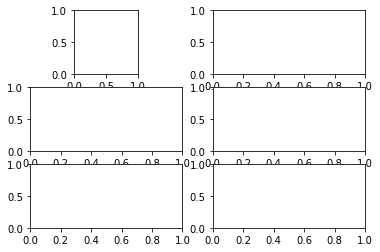

In [3]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)

In [6]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 146, 141, 20, 19, 18, 144, 150, 25, 153, 27, 28, 107, 42, 177, 49, 179, 180, 181, 59, 63, 70, 199, 80, 118, 212, 214, 220, 92, 226, 99, 227, 101, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}
75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [39]:
# TODO
# Your Answer
# I would assume it to be around 5 because it seems to be black and white with some
# differing shades. The actual value is 75
# because we are getting the number of unique shades, which isn't clearly shown visually. 



## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2
{0, 255}


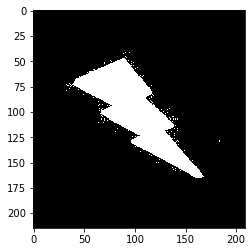

In [35]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,9, 255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))
print(intensity_values)

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [36]:
## TODO
## Your answer
#the image because only two colors and makes the original image look very bad
#because they are limited only to the far ends of the spectrum (black or white, no gray)
#A good value of thresholding would be one that splits it in half because the images
#black abnd white and you want one that divides the two evenly

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

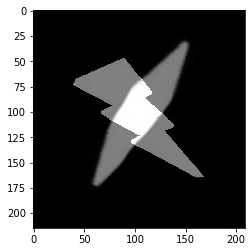

In [48]:
# 1. Blend
# TODO
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
newblob = cv2.resize(blob, (209, 215))
newimg = cv2.addWeighted(newblob, .5, lightningbolt, .5, 0)

plt.imshow(newimg, cmap = "gray")


## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

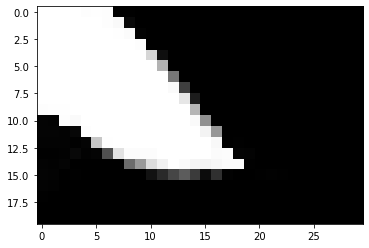

In [50]:
# 2. ROI
# TODO
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
point = lightningbolt[150:170, 150:180]
plt.imshow(point, cmap="gray")


## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

(150, 112)


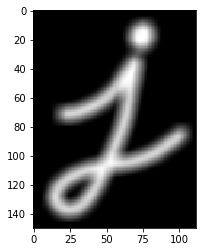

In [54]:
# 3. 
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
print(letterj.shape)
kernel = np.ones((10, 10), np.float32)/100
dst = cv2.filter2D(letterj, -1, kernel)
plt.imshow(dst, cmap="gray")



# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

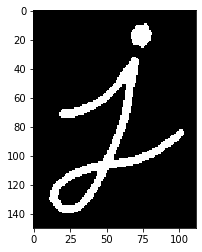

In [71]:
# 4
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)/9
erosion3 = cv2.erode(letterj, kernel, iterations=1)
# plt.imshow(letterj, cmap="gray")
plt.imshow(erosion3, cmap = "gray")

## 5. Perform erosion on j with a 5x5 kernel

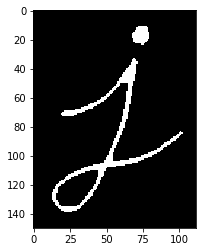

In [70]:
# 5
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5), np.uint8)
erosion4 = cv2.erode(letterj, kernel, iterations=1)
# plt.imshow(letterj, cmap="gray")
plt.imshow(erosion4, cmap = "gray")

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



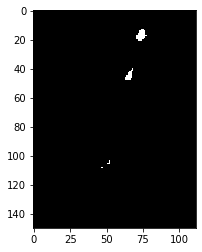

In [67]:
# 6
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)/25
erosion5 = cv2.erode(letterj, kernel, iterations=2)
# plt.imshow(letterj, cmap="gray")
plt.imshow(erosion3, cmap = "gray")

## 7. Perform dilation on j with a 3x3 kernel

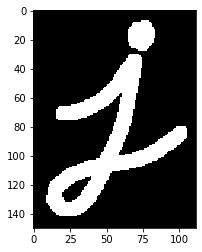

In [72]:
# 7
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)/9
dilation3 = cv2.dilate(letterj, kernel, iterations=1)
# plt.imshow(letterj, cmap="gray")
plt.imshow(dilation3, cmap = "gray")

## 8. Perform dilation on j with a 5x5 kernel

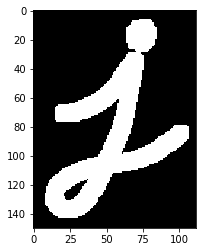

In [73]:
# 8
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5), np.uint8)/25
dilation3 = cv2.dilate(letterj, kernel, iterations=1)
# plt.imshow(letterj, cmap="gray")
plt.imshow(dilation3, cmap = "gray")

## 9. What is the effect of kernel size on morphology operations?

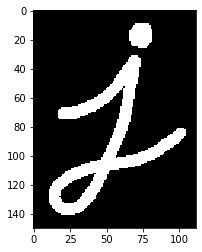

In [76]:
# 9
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)/25
opening = cv2.morphologyEx(letterj, cv2.MORPH_OPEN, kernel)
# plt.imshow(letterj, cmap="gray")
plt.imshow(opening, cmap = "gray")
#if kernel size increases, it will more parts of the actual parts of the image
#that may not be intended

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

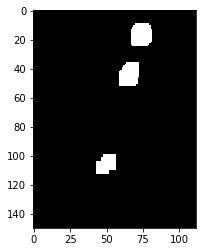

In [83]:
# 10
# TODO
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)/9
opening = cv2.morphologyEx(letterj, cv2.MORPH_OPEN, kernel, iterations=4)
# plt.imshow(letterj, cmap="gray")
plt.imshow(opening, cmap = "gray")
#the single large operation will immediatley remove a large part of the 
#actual image while doing it in small iterations slowly removes more in each iteration

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

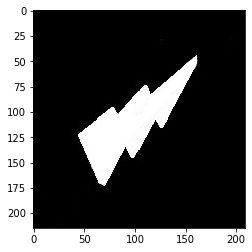

In [87]:
# 11
# TODO
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
rows, cols = lightningbolt.shape
matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
dst = cv2.warpAffine(lightningbolt, matrix, (cols, rows))
plt.imshow(dst, cmap = "gray")


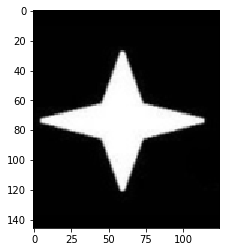

In [88]:
rows2, cols2 = star.shape
matrix2 = cv2.getRotationMatrix2D((cols2/2, rows2/2), 90, 1)
dst2 = cv2.warpAffine(star, matrix2, (cols2, rows2))
plt.imshow(dst2, cmap = "gray")


## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

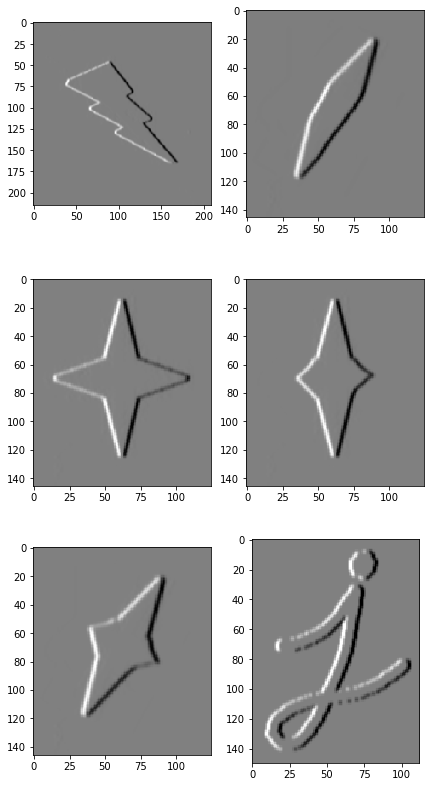

In [98]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    sobelx = cv2.Sobel(i,cv2.CV_64F,1,0,ksize=5)
    a.imshow(sobelx, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)

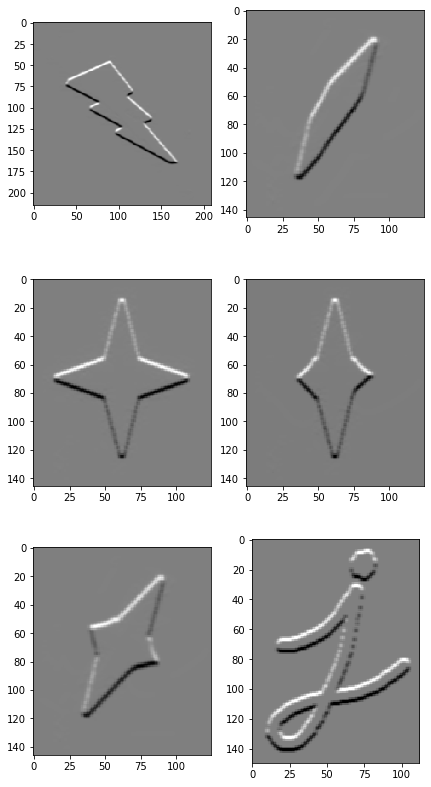

In [97]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    sobely = cv2.Sobel(i,cv2.CV_64F,0,1,ksize=5)
    a.imshow(sobely, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)

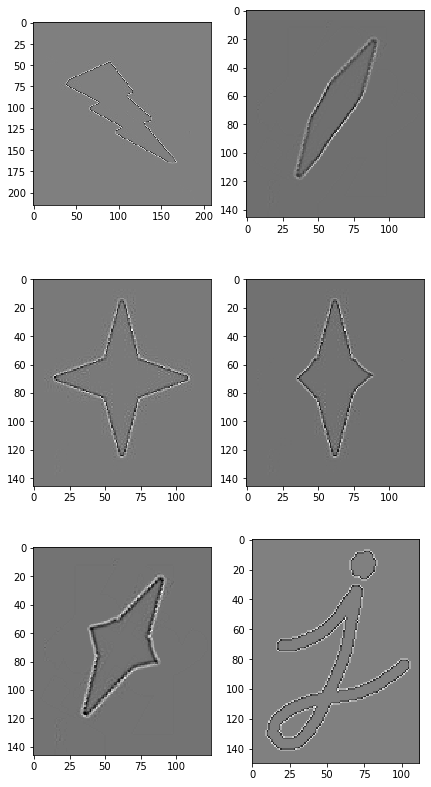

In [96]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    laplacian = cv2.Laplacian(i,cv2.CV_64F)
    a.imshow(laplacian, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)

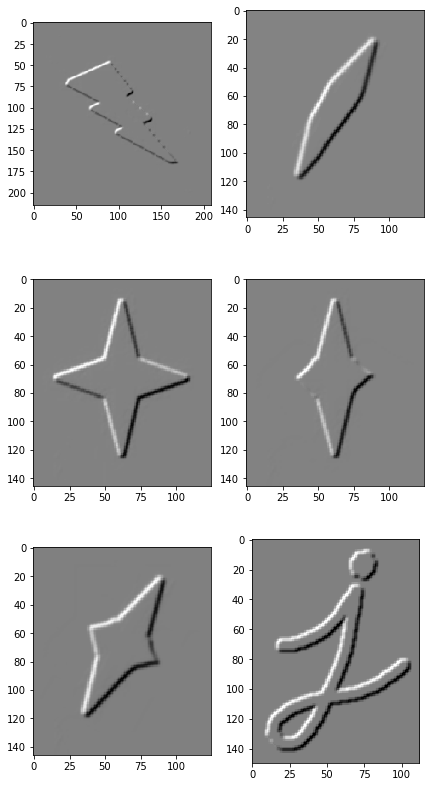

In [104]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    laplacian = cv2.Laplacian(i,cv2.CV_64F)
    sobelx = cv2.Sobel(i, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(i, cv2.CV_64F, 0, 1, ksize=5)    
    # newimg = cv2.addWeighted(laplacian, .5, sobelx, .5, 0)
    # newimg2 = cv2.addWeighted(newimg, .5, sobely, .5, 0)
    newimg2 = laplacian + sobelx + sobely
    a.imshow(newimg2, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 